# Predicting Ranked Choice Voting

## Introduction

Ranked choice voting is a voting system where people can vote for and rank candidates in order of their preference. A consulting company would like to know the best way to increase people's support for ranked choice voting in the U.S. Survey data needs to be analyzed to find the types of people who do and do not already support ranked choice voting. With this information, the company can decide who they should show their education and advertisement campaigns to. 

The main goals of the company are to find who currently supports ranked choice voting and find how to predict people who might not support ranked choice voting. By predicting who might not support ranked choice voting, the company can direct their education and advertisement campaigns to those people. As a result, the company can increase support for ranked choice voting in the United States through their targetted campaigns.

## Data Description

In the Pulse of the Nation dataset, there are 800 people total. There are two tables showing the number of people for each political affiliation and leaning. For political affiliation, there are 60 people who don't know or did not answer. There are 263 people who identify as Democrat, 262 people who identify as Independent, and 215 people who identify as Republican. For political leaning, there are 73 people who don't know or did not answer. There are 245 people who identify as Conservative, 143 people who identify as Liberal, and 339 people who identify as Moderate. 69 people don't know or did not answer whether they support ranked choice. There is also a table showing the number of people who did or did not support ranked choice. 345 people did not support ranked choice voting while 386 people did support ranked choice voting. 

Also included below are contingency tables that list the counts for political affiliation and ranked choice as well as for political leaning and ranked choice. There are also two bar graphs for each contingency table. For the first bar graph comparing political affiliation and ranked choice, there appears to be more Democrats who support ranked choice while more Republicans were against ranked choice. For the second bar graph comparing political leaning and ranked choice, there were more Moderates who supported ranked choice than other political leanings and there were more Moderates who were against ranked choice compared to other political leanings. 

In [18]:
# importing required libraries
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# importing dataset
survey_data = Table.read_table("CAH_PulseoftheNation_FinalProject.csv")

In [3]:
# finding the total number of people there are in the dataset
survey_data.num_rows

800

In [4]:
# here is the number of people that identify with each political affiliation
survey_data.group("Political Affiliation")

Political Affiliation,count
DK/REF,60
Democrat,263
Independent,262
Republican,215


In [5]:
# here is the number of people that identify with each political leaning
survey_data.group("Political Leaning")

Political Leaning,count
Conservative,245
DK/REF,73
Liberal,143
Moderate,339


In [6]:
# here is the number of people that support and don't support ranked choice voting
survey_data.group("Ranked Choice")

Ranked Choice,count
DK/REF,69
No,345
Yes,386


In [7]:
# counts for political affiliation and ranked choice
survey_data.pivot("Political Affiliation", "Ranked Choice")

Ranked Choice,DK/REF,Democrat,Independent,Republican
DK/REF,10,19,24,16
No,20,99,107,119
Yes,30,145,131,80


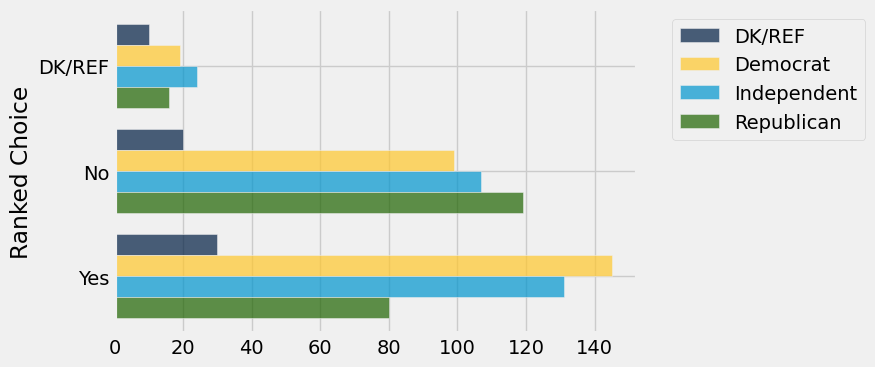

In [8]:
# Bar graph for Political Affiliation and Ranked Choice
survey_data.pivot("Political Affiliation", "Ranked Choice").barh("Ranked Choice")

In [9]:
# counts for political leaning and ranked choice
survey_data.pivot("Political Leaning", "Ranked Choice")

Ranked Choice,Conservative,DK/REF,Liberal,Moderate
DK/REF,24,11,12,22
No,130,25,48,142
Yes,91,37,83,175


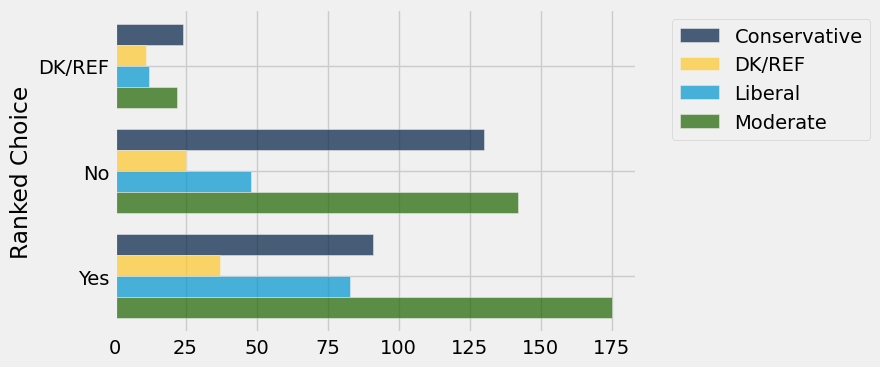

In [10]:
# Bar graph for Political Leaning and Ranked Choice
survey_data.pivot("Political Leaning", "Ranked Choice").barh("Ranked Choice")

## Inference: Hypothesis Test or Confidence Interval

The null hypothesis for my inference is that there is no difference in supporting ranked choice voting between Republicans/Independents and Democrats. The alternative hypothesis for my inference is that there is a difference in supporting ranked choice voting between Republicans/Independents and Democrats. I chose to use a hypothesis test to see whether there is a difference among political affiliations in their support for ranked choice voting. 

First, I removed the variables I was not investigating. I turned responses to ranked choice and political affiliation into True or False. Democrats were considered True while Republicans and Independents were considered False. 'Yes' to ranked choice was considered True while 'No' to ranked choice was considered False. I created a function to calculate the statistic of the difference in means between the two groups. Then, I shuffled the political parties and simulated their support for ranked choice voting. I created another function to calculate the statistic for simulating the shuffling of political parties. I used a for loop to repeat the simulation 1000 times. I created a histogram to visualize the results and calculated the p-value. Because the p-value of 0.006 was greater than 0.05, I can fail to reject the null hypothesis. There is not enough evidence to say that there is a difference in supporting ranked choice voting between Republicans/Independents and Democrats. 

In [11]:
# I am removing the variables that I am not using
removed = survey_data.drop("Trump", "Finances", "Fair Elections", "Woman President", "Universal Healthcare", "Race", "Gender", "Education", "Political Leaning", "Age")

# I am turning the responses to ranked choice and political affiliation into True or False
def true_false_affiliation(response):
    '''
    For a response to political affiliation, turns it into a True or False depending on the answer. Independents will be combined with Republicans.
    response: str, the response to Ranked Choice question
    Returns: a boolean
    '''
    if response == "Democrat":
        return True
    if response == "Republican":
        return False
    else:
        return False
def true_false_ranked(response):
    '''
    For a response to ranked choice voting, turns it into a True or False depending on the answer. 
    response: str, the response to Ranked Choice question
    Returns: a boolean
    '''
    if response == 'Yes':
        return True
    if response == 'No':
        return False
    else: 
        return False
tf_ranked_choice = removed.apply(true_false_ranked, 'Ranked Choice')
tf_affiliation = removed.apply(true_false_affiliation, 'Political Affiliation')
affiliation_and_ranked_choice = removed.with_columns("Political Party", tf_affiliation,
                                      "Ranked Choice Voting", tf_ranked_choice).drop("Political Affiliation", "Ranked Choice")
affiliation_and_ranked_choice.show(3)

Political Party,Ranked Choice Voting
True,False
True,True
True,True


In [12]:
# statistic to calculate
ranked_choice_mean = affiliation_and_ranked_choice.group("Political Party", collect = np.mean)
ranked_choice_mean.column("Ranked Choice Voting mean").item(1)-ranked_choice_mean.column("Ranked Choice Voting mean").item(0)

0.10254122678448785

In [13]:
def statistic(affiliation_and_ranked_choice_table):
    '''
    Arguments:
    affiliation_and_ranked_choice, Table: A table that looks like the affiliation_and_ranked_choice Table.
    
    Returns:
    A statistic that compares the means of the two groups.
    '''
    ranked_choice_mean = affiliation_and_ranked_choice_table.group("Political Party", collect = np.mean)
    
    return ranked_choice_mean.column("Ranked Choice Voting mean").item(1) - ranked_choice_mean.column("Ranked Choice Voting mean").item(0)

observed_statistic = statistic(affiliation_and_ranked_choice)
observed_statistic

0.10254122678448785

In [14]:
shuffled_party = affiliation_and_ranked_choice.sample(affiliation_and_ranked_choice.num_rows).column("Political Party")
simulated_party = Table().with_columns("Ranked Choice Voting", affiliation_and_ranked_choice.column("Ranked Choice Voting"),
                                        "Political Party", shuffled_party)
simulated_party

Ranked Choice Voting,Political Party
False,True
True,False
True,True
True,False
True,False
True,True
False,True
True,False
False,True
False,False


In [15]:
statistic(simulated_party)

-0.017212345307450305

In [16]:
def simulation_and_statistic(table):
    '''
    Simulates shuffling the affiliation_and_ranked_choice table and calculating the statistics.
    
    Returns one statistic.
    '''
    shuffled_party = affiliation_and_ranked_choice.sample(affiliation_and_ranked_choice.num_rows).column("Political Party")
    simulated_party = Table().with_columns("Ranked Choice Voting", affiliation_and_ranked_choice.column("Ranked Choice Voting"),
                                           "Political Party", shuffled_party)
    return statistic(simulated_party)

num_repetitions = 1000

simulated_statistics = make_array()

for i in np.arange(num_repetitions):
    simulated_statistics = np.append(simulated_statistics, simulation_and_statistic(affiliation_and_ranked_choice))


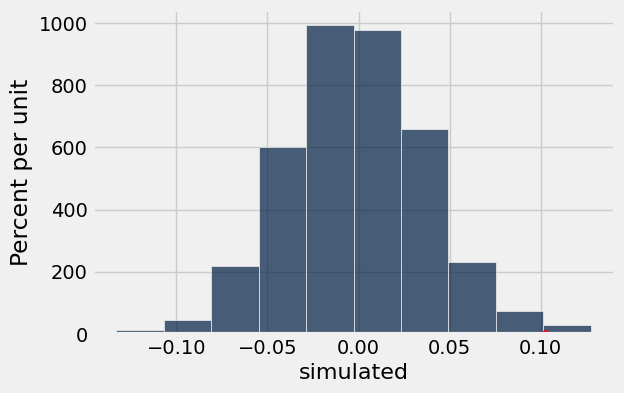

In [17]:
Table().with_columns("simulated", simulated_statistics).hist()
plt.scatter(observed_statistic, 0, color='red', s=30)

In [19]:
p_value = np.sum(simulated_statistics >= observed_statistic) / num_repetitions
p_value

0.0060000000000000001

# Prediction

To approach the prediction problem, I used a K-Nearest Neighbors and decision tree model to predict who supports and who does not support ranked choice voting. We can use these models to see which one best predicts support for ranked choice voting. The outcome variable will be 'ranked choice'. People who support ranked choice voting will be labeled as "1" while people who do not support ranked choice voting will be labeled as "0". Supporting ranked choice voting, which will have a label of "1", will be the "positive" case. For the variables I am looking at (Political Affiliation and Political Leaning), I used "True" and "False" to label the categories within each variable. Then I created a training set with 80% of the survey data and a test set with a random 20% of the data. 

For KNN, I fit the training data into KNN models and set neighbors equal to 5, 9, 15, 19, and 25. I predicted the test set using a threshold of 0.1, 0.2, 0.3, 0.4, and 0.5. Lastly, I used precision, accuracy, and recall scores to evaluate the model. For the decision tree model, I fit the training data into a decision tree model with a max depth of 2, 3, 4, and 5. I predicted the test set using a threshold of 0.1, 0.2, 0.3, 0.4, and 0.5. Lastly, I used precision, accuracy, and recall scores to evaluate the model. 

The precision of the decision tree model was better than the baseline of a random model. The precision of the decision tree was 0.79 while the precision for a baseline of a random model was 0.49. The decision tree with a threshold of 0.5 and max depth of 2 was the best model because it had the highest precision. The precision of the KNN model was also better than the baseline of a random model. The precision of the KNN model was 0.54, which is higher than the baseline precision. The KNN model appeared to have the same precision, accuracy, and recall at all the number of neighbors used. Therefore, the final model I would use is the decision tree model, based on the precision scores. 


In [105]:
# importing the libraries necessary for prediction
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [184]:
# I am removing the variables that I am not using
removed = survey_data.drop("Trump", "Finances", "Fair Elections", "Woman President", "Universal Healthcare", "Race", "Gender", "Education")

# I created a function to turn responses into 1 and 0
def create_ranked_label(response):
    '''
    For a response to ranked choice voting, turns it into a True or False depending on the answer. 
    response: str, the response to Ranked Choice question
    Returns: a boolean
    '''
    if response == 'Yes':
        return 1
    if response == 'No':
        return 0
    else: 
        return 0
ranked_choice_dummy = removed.apply(create_ranked_label, 'Ranked Choice')
ranked_choice_label = removed.with_columns("ranked choice", ranked_choice_dummy).drop("Ranked Choice")

# For the variables we are looking at, I turned each category into True or False for each variable.
democrat = survey_data.column("Political Affiliation") == "Democrat"
republican = survey_data.column("Political Affiliation") == "Republican"
independent = survey_data.column("Political Affiliation") == "Independent"

liberal = survey_data.column("Political Leaning") == "Liberal"
moderate = survey_data.column("Political Leaning") == "Moderate"
conservative = survey_data.column("Political Leaning") == "Conservative"

clean_survey_data = ranked_choice_label.with_columns("Democrat", democrat,
                                                     "Republican", republican,
                                                     "Independent", independent,
                                                     "Liberal", liberal,
                                                     "Moderate", moderate,
                                                     "Conservative", conservative).drop("Political Affiliation", "Political Leaning")
# This is what the data looks like now that it is cleaned up
clean_survey_data.show(3)

Age,ranked choice,Democrat,Republican,Independent,Liberal,Moderate,Conservative
81,0,True,False,False,True,False,False
80,1,True,False,False,False,True,False
65,1,True,False,False,False,True,False


In [182]:
# Find the number of rows you want to take by multiplying the number of rows in survey_data by 0.8. 
rows_to_take = int(0.8*clean_survey_data.num_rows)

# Shuffle the survey_data Table
shuffled_data = clean_survey_data.sample(with_replacement = False)

# Splitting the data into a train and test set
train = shuffled_data.take(np.arange(rows_to_take))
test = shuffled_data.take(np.arange(rows_to_take, clean_survey_data.num_rows))

# checking that 80% of the data are part of the training set (640) and 20% are part of the test set (160)
# train.num_rows
# test.num_rows

## K-Nearest Neighbors

In [183]:
# simulates the KNN model and evaluates the model
k_values = make_array()
threshold_values = make_array()
knn_accuracy = make_array()
knn_precision = make_array()
knn_recall = make_array()
expected = test.column('ranked choice')

for k in make_array(5, 9, 15, 19, 25):
        # creating a model object
        knn = KNeighborsClassifier(n_neighbors = k)
        
        # defining the predictor and outcome
        predictor = train.drop("ranked choice").rows
        outcome = train.column("ranked choice")
        
        # fitting the model
        knn.fit(X = predictor, y = outcome)
        
        test_features = test.drop("ranked choice").rows
        knn_predicted = knn.predict_proba(test_features)[:,1] > threshold
        
        k_values = np.append(k_values, k)
        
for threshold in make_array(0.1, 0.3, 0.5, 0.7, 0.9):
        threshold_values = np.append(threshold_values, threshold)
        knn_accuracy = np.append(knn_accuracy, accuracy_score(test.column("ranked choice"), knn_predicted))
        knn_precision = np.append(knn_precision, precision_score(expected, knn_predicted))
        knn_recall = np.append(knn_recall, recall_score(expected, knn_predicted))

knn_results = Table().with_columns("k", k_values,
                                   "Threshold", threshold_values,
                                   "Accuracy", knn_accuracy,
                                   "Precision", knn_precision,
                                   "Recall", knn_recall)
                                   
knn_results.sort("Precision", descending = True)


k,Threshold,Accuracy,Precision,Recall
5,0.1,0.5375,0.540984,0.417722
9,0.3,0.5375,0.540984,0.417722
15,0.5,0.5375,0.540984,0.417722
19,0.7,0.5375,0.540984,0.417722
25,0.9,0.5375,0.540984,0.417722


## Decision Tree

In [177]:
thresholds = make_array()
depths = make_array()
precisions = make_array()
recalls = make_array()


predictors = train.drop('ranked choice').rows
outcome = train.column('ranked choice')
expected = test.column('ranked choice')


for threshold in make_array(0.1, 0.2, 0.3, 0.4, 0.5):
    for depth in make_array(2, 3, 4, 5):
        tree = DecisionTreeClassifier(max_depth = depth)
        tree.fit(X = predictors, y = outcome)
        test_features = test.drop('ranked choice').rows
        tree_predicted = tree.predict_proba(test_features)[:,1] > threshold
        thresholds = np.append(thresholds, threshold)
        depths = np.append(depths, depth)
        precisions = np.append(precisions, precision_score(expected, tree_predicted))
        recalls = np.append(recalls, recall_score(expected, tree_predicted))
        
tree_results = Table().with_columns('Threshold', thresholds,
                                    'Max Depth', depths,
                                    'Precision', precisions,
                                    'Recall', recalls)

tree_results.sort("Precision", descending = True)

Threshold,Max Depth,Precision,Recall
0.5,2,0.787879,0.309524
0.5,3,0.736842,0.333333
0.5,5,0.696429,0.464286
0.4,4,0.614583,0.702381
0.5,4,0.609195,0.630952
0.4,3,0.6,0.714286
0.4,5,0.59375,0.678571
0.3,4,0.578947,0.916667
0.3,3,0.578125,0.880952
0.4,2,0.574803,0.869048


In [185]:
# test the decision tree against a baseline
test.group('ranked choice')

ranked choice,count
0,81
1,79


In [186]:
79/(81+79)

0.49375

## Conclusion

Ranked choice voting is where people can vote for and rank candidates in order of their preference. A consulting company wanted to know the best way to increase people's support for ranked choice voting in the U.S. by finding who currently supports ranked choice voting and predicting who might not support ranked choice voting. 

First, I performed a hypothesis test testing whether there is a difference in support for ranked choice voting between Republicans/Independents and Democrats. I calculated a p-value of 0.006, which was greater than 0.05. I failed to reject the null hypothesis. There was not enough evidence to say that there is a difference in supporting ranked choice voting between Republicans/Independents and Democrats. The consulting company may not be able to use political affiliation to predict who supports ranked choice voting because there may be no difference between the political parties. The consulting company may want to observe and test other variables to predict who supports ranked choice voting. 

Next, I created K-nearest neighbors and decision tree models to predict who might not support ranked choice voting. I found that a decision tree with a max depth of 2 and threshold of 0.5 was the best model of prediction. The consulting company may want to use a decision tree for their predictions. 

These results are important and can be applied in the real world because we can use existing data on types of people to try to predict their behavior and choices. This has a wide variety of applications in various industries because people make hundreds of decisions every day.  